In [90]:
from create_datasets import read_json_dataset
from dict_utils import unfold_to_list, fold_from_list
from pipeline import Pipeline, FewShotPipeline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize':(14,10)})
DIV_CMAP = sns.diverging_palette(220, 0, as_cmap=True) # DIVERGENT COLOR MAP

def get_model_scores_std(data):
    scores = [s for s in data["scores"]]
    return np.std(scores)

def get_model(data):
    return data["source"]

def add_model_scores_std(data):
    data["scores_std"] = data["metadata"].apply(get_model_scores_std)
    
def add_model(data):
    data["candidate_model"] = data["metadata"].apply(get_model)

In [91]:
DATASET_DIR = "../data/lr_experiments"
LERC_PREDS_DIR = f"{DATASET_DIR}/lerc_preds"

train = read_json_dataset(DATASET_DIR, "qasper_metrics")
print(len(train))

train_df = pd.DataFrame(unfold_to_list(train, "dataset", "example_id"))
print(train_df.shape)

add_model(train_df)
add_model_scores_std(train_df)

train_df["score"] = train_df["score"].apply(lambda s: s * 4 + 1)
train_df["dataset"] = train_df["annotation_type"]

# TODO - Train test split?
dev_df = train_df.copy()
test_df = train_df.copy()

1
(200, 51)


In [92]:
DATASETS = list(train_df.dataset.unique())

METRICS = [
    # Bleu
    'bleu1', 'bleu2', 
    'bleu3', 'bleu4', 
    # 'hf_bleu1', 'hf_bleu2', 'hf_bleu3', 'hf_bleu4', 
    'rougeL', 
    # 'hf_rougeL', 'hf_rougeLsum',
    'hf_rouge1', 'hf_rouge2',
    'meteor',
    'recall', 'precision', 'f1_score',
    'sari_context', 'sari_question',
    # Token overlap when 1st error occurred
    'precision_at_err1', 'recall_at_err1',
    # Confusion matrix
    'tp', 'fn', 'fp',
    # Edit scores ------
    'char_edit_score', 'word_edit_score',
    # Learned metrics -------
    'bertscore', 'bleurt',
    "LERC",
    # Input statistics ------
    'candidatelength_word', 'candidatelength_char',
    'candidatenunique_words', 'referencelength_word',
    'referencelength_char', 'referencenunique_words',
    'contextlength_word', 'contextlength_char',
    'contextnunique_words', 'questionlength_word',
    'questionlength_char', 'questionnunique_words',
]

TARGET = "score_scaled"

**Validate numbers reported in original MOCHA paper**

Most of the values are close to the numbers reported in the paper. The ones that are not, are consistently higher.

In [93]:
from scipy.stats import pearsonr


_df = train_df
print(dataset, "bleu1", round(pearsonr(_df["score_scaled"], _df["bleu1"])[0], 3))
print(dataset, "meteor", round(pearsonr(_df["score_scaled"], _df["meteor"])[0], 3))
print(dataset, "rougeL", round(pearsonr(_df["score_scaled"], _df["rougeL"])[0], 3))
print(dataset, "bert-score", round(pearsonr(_df["score_scaled"], _df["bertscore"])[0], 3))
print(dataset, "LERC", round(pearsonr(_df["score_scaled"][:100], _df["LERC"][:100])[0], 3))
    
    
for dataset in DATASETS:
    print(); print(f"---- {dataset} ----")
    _df = train_df[train_df.dataset == dataset]
    print(dataset, "bleu1", round(pearsonr(_df["score_scaled"], _df["bleu1"])[0], 3))
    print(dataset, "meteor", round(pearsonr(_df["score_scaled"], _df["meteor"])[0], 3))
    print(dataset, "rougeL", round(pearsonr(_df["score_scaled"], _df["rougeL"])[0], 3))
    print(dataset, "bert-score", round(pearsonr(_df["score_scaled"], _df["bertscore"])[0], 3))
    print(dataset, "LERC", round(pearsonr(_df["score_scaled"][:100], _df["LERC"][:100])[0], 3))
    
    
    
    print()

none bleu1 0.679
none meteor 0.717
none rougeL 0.701
none bert-score 0.521
none LERC 0.751

---- extractive ----
extractive bleu1 0.641
extractive meteor 0.681
extractive rougeL 0.694
extractive bert-score 0.671
extractive LERC 0.826


---- boolean ----
boolean bleu1 0.878
boolean meteor 0.878
boolean rougeL 0.878
boolean bert-score 0.107
boolean LERC 0.735


---- abstractive ----
abstractive bleu1 0.467
abstractive meteor 0.559
abstractive rougeL 0.494
abstractive bert-score 0.423
abstractive LERC 0.398


---- none ----
none bleu1 0.867
none meteor 0.917
none rougeL 0.82
none bert-score 0.643
none LERC 0.672



In [94]:
# todo - barplot dodge with bleu values for the different metrics and datasets

In [95]:
from scipy.stats import pearsonr

for annot in train_df.annotation_type.unique():
    print(); print("---- ALL SET ----")
    _df = train_df[train_df.annotation_type == annot]
    print(annot, "bleu1", round(pearsonr(_df["score_scaled"], _df["bleu1"])[0], 3))
    print(annot, "meteor", round(pearsonr(_df["score_scaled"], _df["meteor"])[0], 3))
    print(annot, "rougeL", round(pearsonr(_df["score_scaled"], _df["rougeL"])[0], 3))
    print(annot, "bert-score", round(pearsonr(_df["score_scaled"], _df["bertscore"])[0], 3))
    print(annot, "LERC", round(pearsonr(_df["score_scaled"][:100], _df["LERC"][:100])[0], 3))
    
    print()


---- ALL SET ----
extractive bleu1 0.641
extractive meteor 0.681
extractive rougeL 0.694
extractive bert-score 0.671
extractive LERC 0.826


---- ALL SET ----
boolean bleu1 0.878
boolean meteor 0.878
boolean rougeL 0.878
boolean bert-score 0.107
boolean LERC 0.735


---- ALL SET ----
abstractive bleu1 0.467
abstractive meteor 0.559
abstractive rougeL 0.494
abstractive bert-score 0.423
abstractive LERC 0.398


---- ALL SET ----
none bleu1 0.867
none meteor 0.917
none rougeL 0.82
none bert-score 0.643
none LERC 0.672



In [96]:
TRAIN_DATASETS = {"qasper": train_df}
DEV_DATASETS   = {"qasper": train_df}

In [97]:
dataset = sorted(dev_df.dataset.unique())
dataset_colors = {model: sns.color_palette(n_colors=7)[i] for i, model in enumerate(dataset)}

models = sorted(dev_df.candidate_model.unique())
models_colors = {model: sns.color_palette(n_colors=7)[i] for i, model in enumerate(models)}

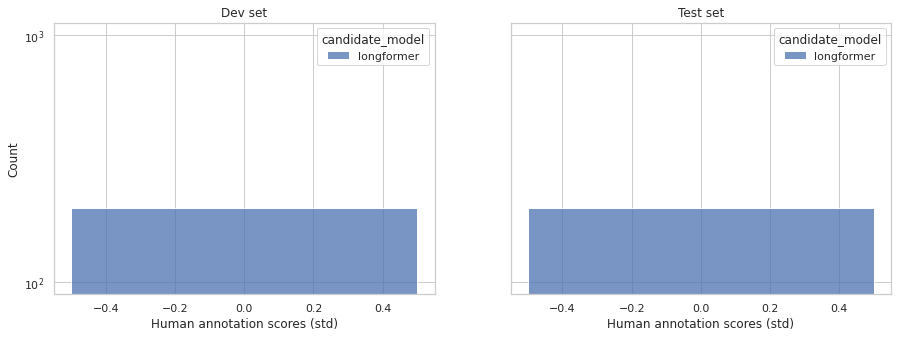

In [98]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))

sns.histplot(dev_df, x="scores_std", hue="candidate_model", multiple="stack", ax=axes[0], palette=models_colors)
axes[0].set_yscale("log")
axes[0].set_title("Dev set")
axes[0].set_xlabel("Human annotation scores (std)")
# axes[0].get_legend().remove()

sns.histplot(test_df, x="scores_std", hue="candidate_model", multiple="stack", ax=axes[1], palette=models_colors)
axes[1].set_yscale("log")
axes[1].set_xlabel("Human annotation scores (std)")
axes[1].set_title("Test set")
plt.show()

Text(0.5, 0, 'Correctness levels')

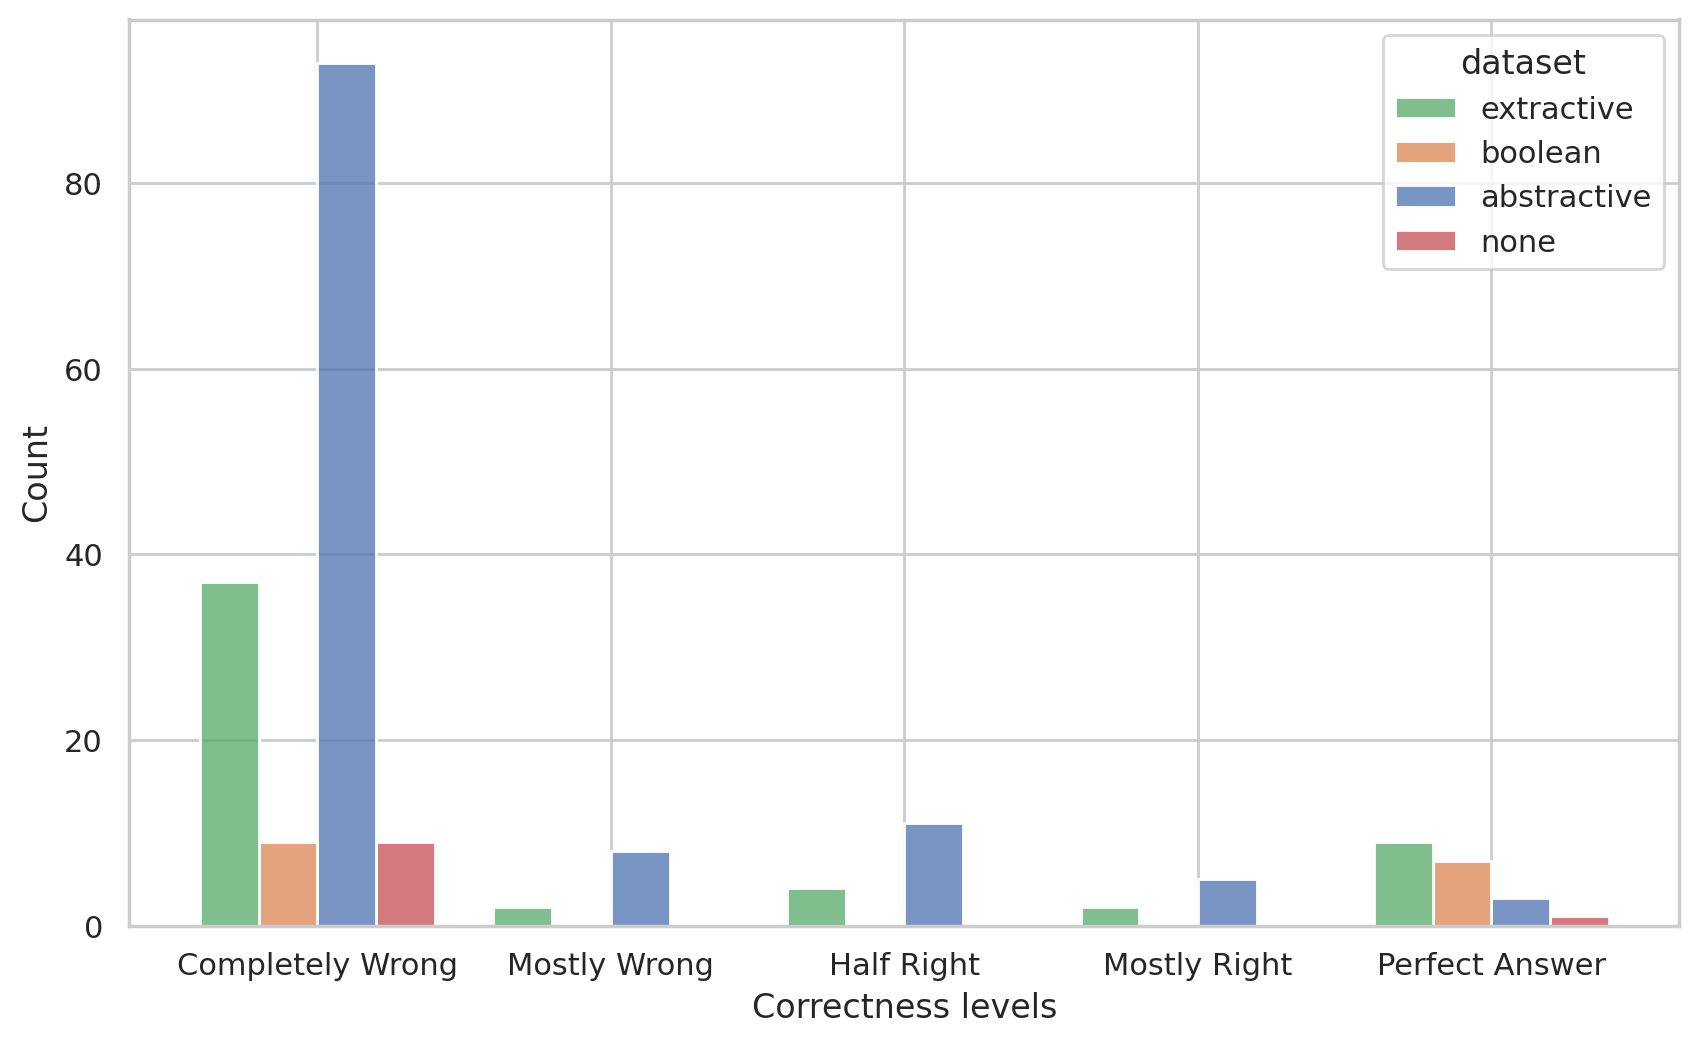

In [99]:
def get_category(data):
    labels = ["Completely Wrong", "Mostly Wrong", "Half Right", "Mostly Right", "Perfect Answer"]
    data_ix = int(data)-1
    return labels[data_ix]

plt.figure(figsize=(10, 6), dpi=200)
train_df["score_str"] = train_df.score.apply(get_category)
train_df["score_str"] = pd.Categorical(train_df.score_str, ordered=True, categories=["Completely Wrong", "Mostly Wrong", "Half Right", "Mostly Right", "Perfect Answer"])
sns.histplot(train_df, x="score_str", hue="dataset", multiple="dodge",  palette=dataset_colors, shrink=0.8)
plt.xlabel("Correctness levels")

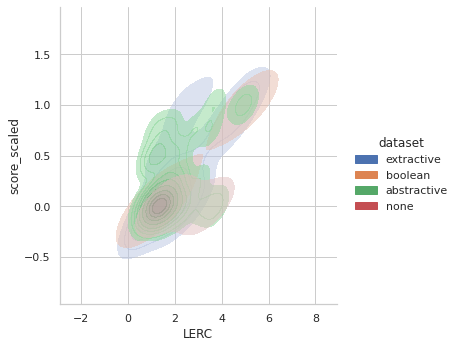

In [100]:
sns.displot(data=train_df, x="LERC", y="score_scaled", hue="dataset", alpha=0.5, kind="kde", fill=True)

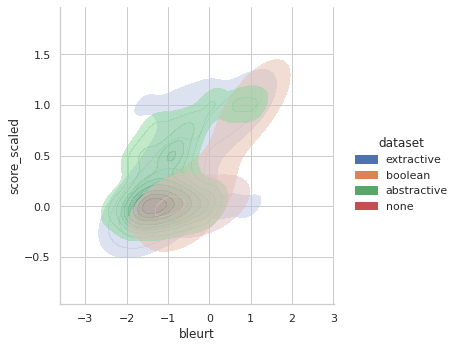

In [101]:
sns.displot(data=train_df, x="bleurt", y="score_scaled", hue="dataset", alpha=0.5, kind="kde", fill=True)

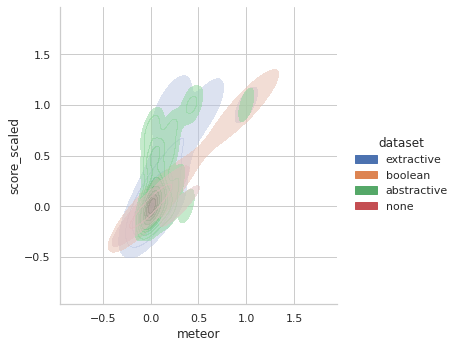

In [102]:
sns.displot(data=train_df, x="meteor", y="score_scaled", hue="dataset", alpha=0.5, kind="kde", fill=True)

<AxesSubplot:xlabel='score_str', ylabel='LERC'>

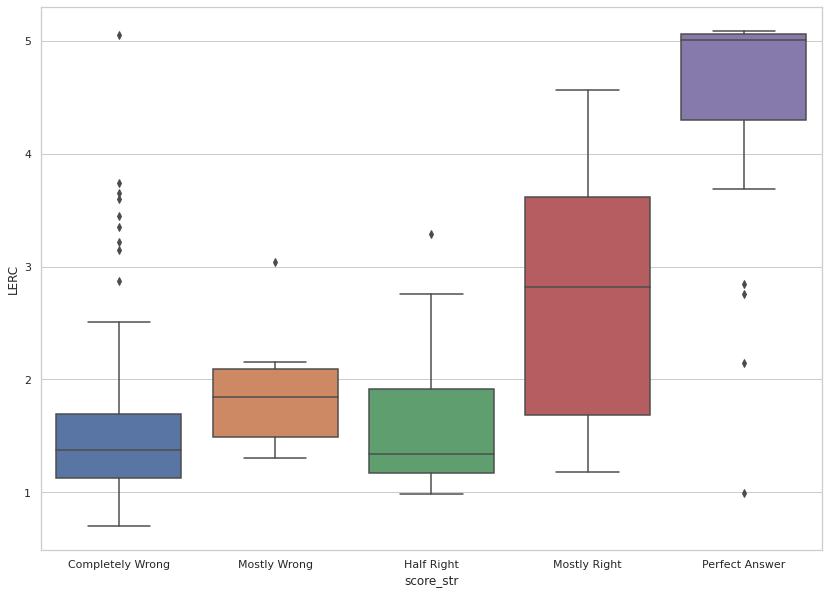

In [103]:
sns.boxplot(data=train_df, x="score_str", y="LERC")

<AxesSubplot:xlabel='score_str', ylabel='bleurt'>

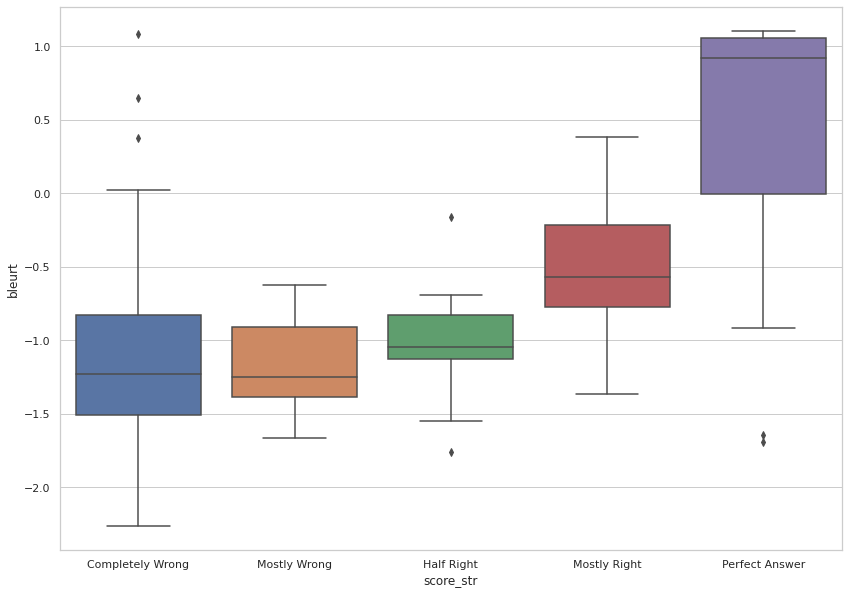

In [104]:
sns.boxplot(data=train_df, x="score_str", y="bleurt")

<AxesSubplot:xlabel='score_str', ylabel='meteor'>

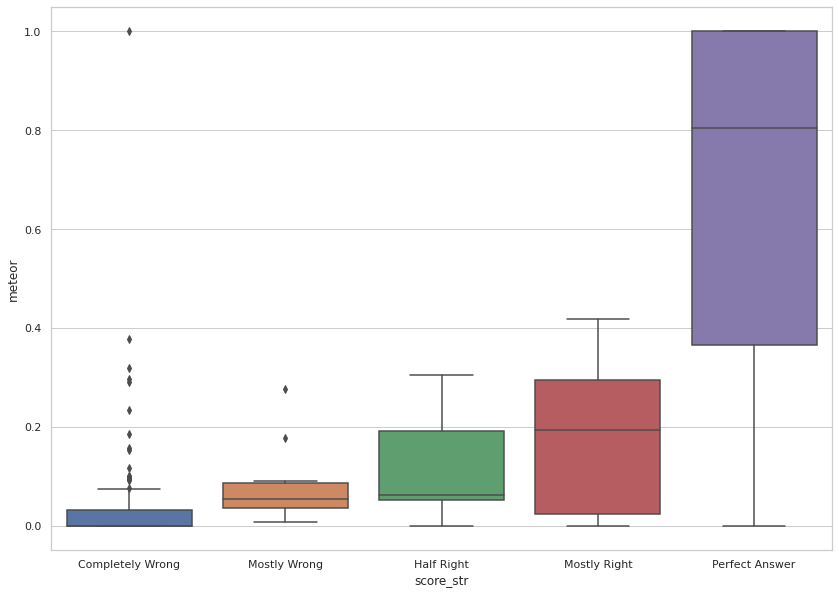

In [105]:
sns.boxplot(data=train_df, x="score_str", y="meteor")

In [106]:
train_df.score_str.isin(["Completely Wrong", "Mostly Wrong"]).sum()/len(train_df)

0.79

In [107]:
d = train_df[train_df["annotation_type"] == "boolean"]
pd.concat((d["bleu1"].apply(round), d["meteor"].apply(round), d["rougeL"].apply(round), d["score_scaled"], d["LERC"], d["candidate"], d["reference"]), axis=1).sort_values(["bleu1", "score_scaled"])

,bleu1,meteor,rougeL,score_scaled,LERC,candidate,reference
1,0,0,0,0.0,1.005072,Yes,No
3,0,0,0,0.0,1.373799,Unanswerable,Yes
14,0,0,0,0.0,5.049659,Yes,No
49,0,0,0,0.0,0.997800,No,Yes
53,0,0,0,0.0,1.000522,No,Yes
56,0,0,0,0.0,1.077209,Yes,No
64,0,0,0,0.0,1.712267,Unanswerable,Yes
69,0,0,0,0.0,0.922813,No,Yes
75,0,0,0,0.0,1.052048,No,Yes
58,0,0,0,1.0,5.052334,No,only in the 806-class task predicting <= 25 cl...


In [136]:
d = train_df[train_df["annotation_type"] == "none"]
pd.concat((d["bleu1"].apply(lambda r: round(r, 2)), d["meteor"].apply(lambda r: round(r, 2)), d["rougeL"].apply(lambda r: round(r, 2)), d["precision"], d["fn"], d["fp"], d["LERC"], d["score_scaled"], d["candidate"], d["reference"]), axis=1).sort_values(["bleu1", "score_scaled"])

,bleu1,meteor,rougeL,precision,fn,fp,LERC,score_scaled,candidate,reference
25,0.00,0.00,0.00,0.00,1,1,3.601686,0.0,No,Unanswerable
26,0.00,0.00,0.00,0.00,1,6,3.220174,0.0,Oracle Bone Inscriptions (Oracle Bone Inscript...,Unanswerable
34,0.00,0.00,0.00,0.00,1,8,1.788697,0.0,4 million images and 7.6 million attribute-val...,Unanswerable
70,0.00,0.00,0.00,0.00,1,1,3.351460,0.0,No,Unanswerable
80,0.00,0.00,0.00,0.00,1,1,1.096581,0.0,Yes,Unanswerable
88,0.00,0.00,0.00,0.00,1,1,3.445028,0.0,No,Unanswerable
99,0.00,0.00,0.00,0.00,1,1,1.792766,0.0,LSTM,Unanswerable
17,0.25,0.30,0.45,0.25,0,3,1.548102,0.0,Transformer architecture of BIBREF10,Transformer
90,0.50,0.32,0.50,0.50,1,1,1.668119,0.0,micro-average recall,macro-average recall
59,1.00,1.00,1.00,1.00,0,0,5.060999,1.0,Unanswerable,Unanswerable


In [134]:
from tokenization import normalize_answer, remove_punc

x1 = "micro-average recall"
x2 = "macro-average recall"

x1 = [remove_punc(x1)]
x2 = [remove_punc(x2)]
print(x1, x2)

y1 = "Transformer architecture of BIBREF10"
y2 = "Transformer"

from pycocoevalcap.meteor.meteor import Meteor as pccMeteor
from pycocoevalcap.rouge.rouge import Rouge as pccRouge
from pycocoevalcap.bleu.bleu import Bleu as pccBleu

BLEU = pccBleu(2)
BLEU.compute_score(res={0: x1, 1: [remove_punc(y1)]}, gts={0: x2, 1: [remove_punc(y2)]})[1]

['micro-average recall'] ['macro-average recall']


[[0.49999999950000074, 0.24999999993750027],
 [2.2360679747047065e-08, 9.128709289090234e-09]]

In [110]:
x1 = np.array([0] * 10 + [1] * 6) 
x2 = np.array([0] * 8 + [1] * 2 + [0] + [1] * 5)

from scipy.stats import pearsonr

pearsonr(x1, x2)

(0.6180700462007377, 0.010718710441942288)

In [15]:
d = train_df.groupby(["dataset", "score_str"]).count()["context"].to_frame().reset_index("score_str")
d = d.merge(train_df.groupby(["dataset"]).count()["context"].to_frame(), how="left", on="dataset")
d["freq"] = d["context_x"] / d["context_y"]
d

,score_str,context_x,context_y,freq
dataset,,,,
abstractive,Completely Wrong,93,120,0.775000
abstractive,Mostly Wrong,8,120,0.066667
abstractive,Half Right,11,120,0.091667
abstractive,Mostly Right,5,120,0.041667
abstractive,Perfect Answer,3,120,0.025000
boolean,Completely Wrong,9,16,0.562500
boolean,Mostly Wrong,0,16,0.000000
boolean,Half Right,0,16,0.000000
boolean,Mostly Right,0,16,0.000000


<AxesSubplot:xlabel='score', ylabel='Count'>

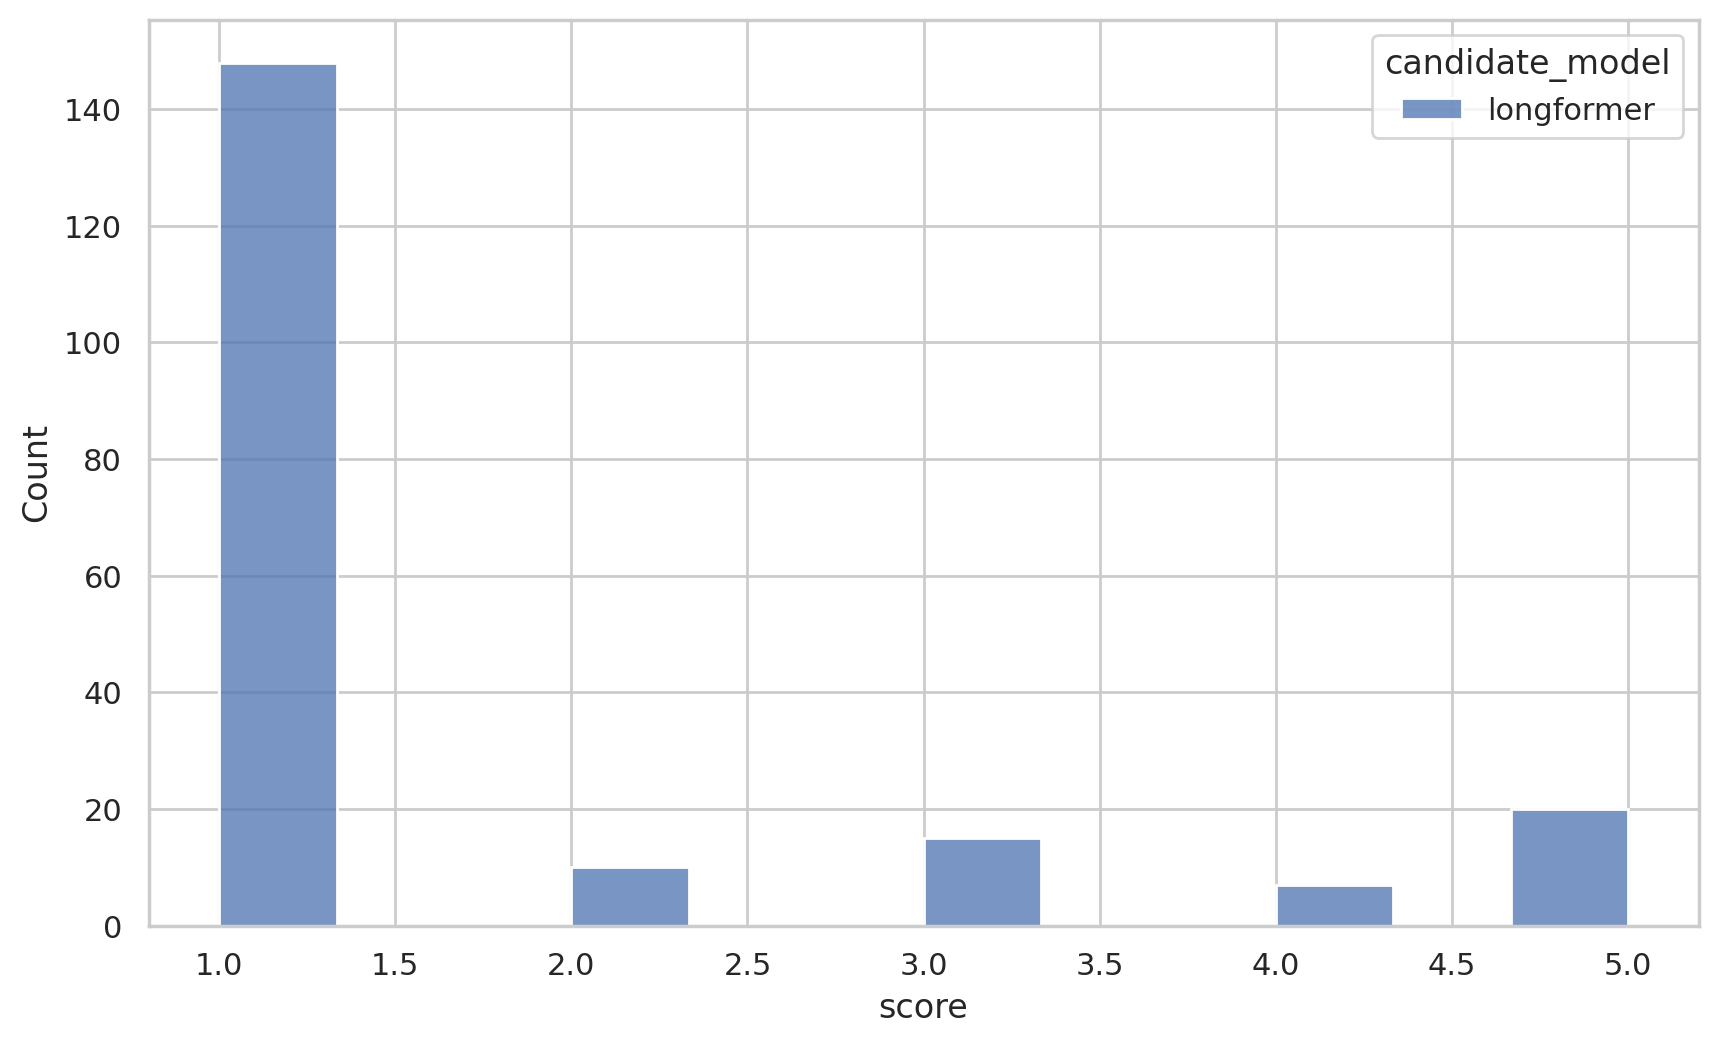

In [16]:
plt.figure(figsize=(10, 6), dpi=200)
sns.histplot(train_df, x="score", hue="candidate_model", multiple="stack", palette=models_colors)

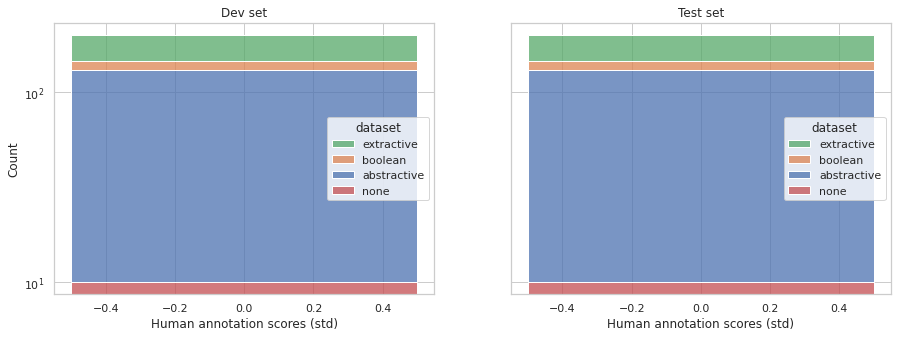

In [17]:
fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5))

sns.histplot(dev_df, x="scores_std", hue="dataset", multiple="stack", ax=axes[0], palette=dataset_colors)
axes[0].set_yscale("log")
axes[0].set_title("Dev set")
axes[0].set_xlabel("Human annotation scores (std)")
#axes[0].get_legend().remove()


sns.histplot(test_df, x="scores_std", hue="dataset", multiple="stack", ax=axes[1], palette=dataset_colors)
axes[1].set_yscale("log")
axes[1].set_title("Test set")
axes[1].set_xlabel("Human annotation scores (std)")
plt.show()

[None, None]

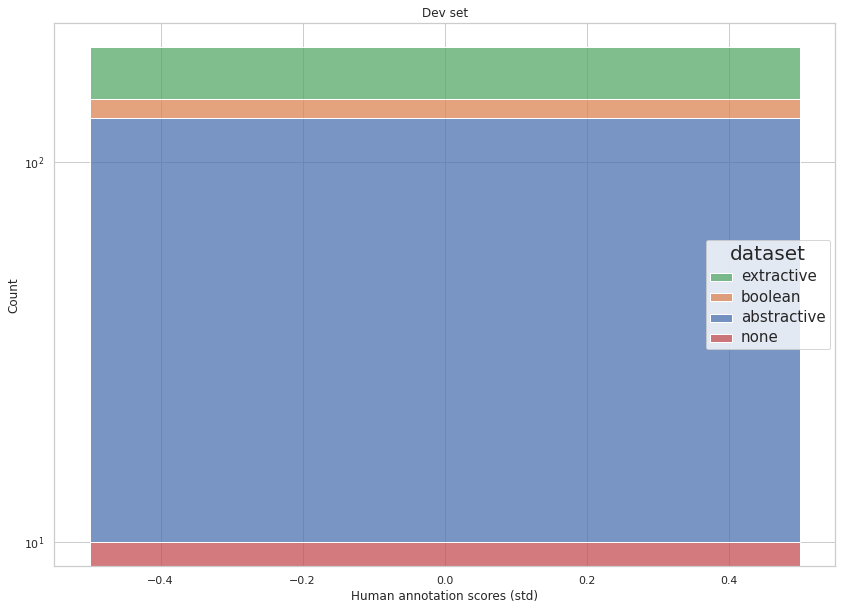

In [18]:
hst = sns.histplot(dev_df, x="scores_std", hue="dataset", multiple="stack", palette=dataset_colors)
plt.yscale("log")
plt.title("Dev set")
plt.xlabel("Human annotation scores (std)")
#axes[0].get_legend().remove()
plt.setp(hst.get_legend().get_texts(), fontsize='15') 
plt.setp(hst.get_legend().get_title(), fontsize='20') 


In [ ]:
dataset = sorted(dev_df.dataset.unique())
dataset_colors = {model: sns.color_palette(n_colors=7)[i] for i, model in enumerate(dataset)}

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
hist_kwargs = {"bins": 20}

sns.histplot(train_df, x="score_scaled", hue="dataset", multiple="stack", ax=axes[0], palette=dataset_colors, **hist_kwargs)
axes[0].set_yscale("log")
axes[0].set_title("Train set")
axes[0].get_legend().remove()


sns.histplot(dev_df, x="score_scaled", hue="dataset", multiple="stack", ax=axes[1], palette=dataset_colors, **hist_kwargs)
axes[1].set_yscale("log")
axes[1].set_title("Dev set")
axes[1].get_legend().remove()


sns.histplot(test_df, x="score_scaled", hue="dataset", multiple="stack", ax=axes[2], palette=dataset_colors, **hist_kwargs)
axes[2].set_yscale("log")
axes[2].set_title("Test set")

plt.show()

In [ ]:
dataset = sorted(dev_df.dataset.unique())
dataset_colors = {model: sns.color_palette(n_colors=7)[i] for i, model in enumerate(dataset)}

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15, 5))
hist_kwargs = {"bins": 20, "hue": "candidate_model", "multiple": "stack", "palette": models_colors}

sns.histplot(train_df, x="score_scaled", ax=axes[0],  **hist_kwargs)
axes[0].set_yscale("log")
axes[0].set_title("Train set")
axes[0].get_legend().remove()


sns.histplot(dev_df, x="score_scaled", ax=axes[1], **hist_kwargs)
axes[1].set_yscale("log")
axes[1].set_title("Dev set")
#axes[1].get_legend().remove()


sns.histplot(test_df, x="score_scaled", ax=axes[2], **hist_kwargs)
axes[2].set_yscale("log")
axes[2].set_title("Test set")
axes[2].get_legend().remove()

plt.show()

In [ ]:
data = dev_df.copy()
data["mix"] = data["candidate_model"] + data["dataset"]

sns.histplot(data, x="score_scaled", hue="mix", multiple="stack")


plt.show()

In [ ]:
data = test_df.copy()
data["mix"] = data["candidate_model"] + data["dataset"]

sns.histplot(data, x="scores_std", hue="mix", multiple="stack")
plt.show()

In [ ]:
dataset_colors

In [ ]:
for dataset in DATASETS:
    data = dev_df[dev_df["dataset"] == dataset]
    sns.displot(x=data["score_scaled"], y=data["LERC"], palette=dataset_colors, hue=data["dataset"], kind="kde", fill=True, alpha=0.5)

## Distributions

In [ ]:
import json

diffs = {}
for metric in ("rougeL", "bleu1", "bleu2", "bleu3", "bleu4"):
    diff = dev_df[np.abs(dev_df[metric] - dev_df[f"hf_{metric}"]) > 1e-5]
    print(len(diff), f"(out of {len(dev_df)}) where {metric} values differ")
    
    diffs[metric] = {"n": len(dev_df), "n_differences": len(diff)}
    sns.scatterplot(data=diff, x=metric, y=f"hf_{metric}", hue="score", alpha=0.5)
    plt.xlabel(f"{metric} (PyCoco)")
    plt.ylabel(f"{metric} (huging face)")
    plt.title(metric)
    plt.ylim(-0.01, 1)
    plt.savefig(f"images/{metric}_implementation_diffs.png", dpi=200)
    plt.show()
    
with open("images/implementation_diffs.json", "w") as f:
    json.dump(diffs, f)

In [ ]:
train_df.head(1)

In [ ]:
metrics_name = []
for m in METRICS:

    m = m.replace("reference", "ref_")
    m = m.replace("candidate", "cand_")
    m = m.replace("question", "qst_")
    m = m.replace("context", "ctxt_")
    m = m.replace("length", "len")
    m = m.replace("words", "w")
    m = m.replace("word", "w")
    m = m.replace("char", "c")
        
    m = m.replace("hf_", "")
    
    m = m.replace("precision_at_err1", "P@err-1")
    m = m.replace("recall_at_err1", "R@err-1")
    m = m.replace("c_edit_score", "edit_score_c")
    m = m.replace("w_edit_score", "edit_score_w")
    
    for c in ("len", "nunique"):
        m = m.replace(f"cand_{c}", f"{c}_cand")
        m = m.replace(f"ref_{c}", f"{c}_ref")
        m = m.replace(f"ctxt_{c}", f"{c}_ctxt")
        m = m.replace(f"qst_{c}", f"{c}_qst")
    metrics_name.append(m)

data = train_df[METRICS + [TARGET]].copy()
data.columns = metrics_name + [TARGET]
data = data.reindex(sorted(data.columns), axis=1)

plt.figure(figsize=(10, 8), dpi=200)
sns.heatmap(data.corr("pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP)
plt.show()

for dataset in DATASETS:
    data = train_df[train_df.dataset == dataset]
    data = data[METRICS + [TARGET]].copy()
    data.columns = metrics_name + [TARGET]
    data = data.reindex(sorted(data.columns), axis=1)

    plt.figure(figsize=(10, 8), dpi=200)
    sns.heatmap(data.corr("pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP)
    plt.title(dataset)
    plt.savefig(f"images/pearson_corr_train_df_{dataset}_final.png", dpi=200)
    plt.show()

In [ ]:
for dataset in DATASETS:
    data = train_df[train_df.dataset == dataset]
    data = data[METRICS + [TARGET]].copy()
    data.columns = metrics_name + [TARGET]
    data = data.reindex(sorted(data.columns), axis=1)

    plt.figure(figsize=(10, 8), dpi=200)
    sns.heatmap(data.corr("kendall"), vmin=-1, vmax=1, cmap=DIV_CMAP)
    plt.title(dataset)
    plt.savefig(f"images/kendall_corr_train_df_{dataset}_final.png", dpi=200)
    plt.show()

In [ ]:
def plot_correlations(data, col, corr_method="pearson", figsize=(16, 12), **kwargs):
    plt.figure(figsize=figsize)
    sns.heatmap(data.corr(method=corr_method), vmin=-1, vmax=1, cmap=DIV_CMAP, annot=True, fmt=".2", **kwargs)
    plt.savefig(f"images/corr_{corr_method}_all_datasets.png", dpi=200)
    plt.show() 

    for val in data[col].unique():
        plt.figure(figsize=figsize)
        df = data[data[col] == val]
        sns.heatmap(df.corr(method=corr_method), vmin=-1, vmax=1, cmap=DIV_CMAP, annot=True, fmt=".2", **kwargs)
        plt.title(f"{col}={val}")
        plt.savefig(f"images/corr_{corr_method}_{val}.png", dpi=200)
        plt.show()

In [ ]:
plot_correlations(train_df[[TARGET] + METRICS + ["dataset"]], "dataset", figsize=(30, 20))

In [ ]:
plot_correlations(dev_df[[TARGET] + METRICS + ["dataset"]], "dataset", corr_method="spearman", figsize=(30, 20))

### Distribution of Correctness

In [ ]:
data, split = train_df, "train"

fig, axes = plt.subplots(nrows=data.dataset.nunique(), ncols=3, figsize=(8, 15), tight_layout=True)

for i, dataset in enumerate(data.dataset.unique()):
    ax_pearson, ax_spearman, ax_correctness = axes[i, 0], axes[i, 1], axes[i, 2]
    df = data[data["dataset"] == dataset]
    df_features = df[METRICS]
    
    sns.heatmap(df_features.corr(method="pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False,  ax=ax_pearson)
    ax_pearson.set_title(f"Pearson ({dataset})")
    
    sns.heatmap(df_features.corr(method="spearman"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False, ax=ax_spearman)
    ax_spearman.set_title(f"Spearman ({dataset})")
    
    ax_correctness.set_title(f"Distribution of correctness ({dataset})")
    sns.histplot(df, x=TARGET, ax=ax_correctness, bins=10, binrange=(0,1))
plt.savefig(f"images/dist_correctness_{split}.png", dpi=200)

In [ ]:
data = train_df
# How do these correlations change when we consider the subset of questions >= 2
fig, axes = plt.subplots(nrows=data.dataset.nunique(), ncols=3, figsize=(8, 15), tight_layout=True)

data = data[(data[TARGET] > 0.25)]# & (data[TARGET] <= 0.75)]
for i, dataset in enumerate(data.dataset.unique()):
    ax_pearson, ax_spearman, ax_correctness = axes[i, 0], axes[i, 1], axes[i, 2]
    df = data[data["dataset"] == dataset]
    df_features = df[METRICS]
    
    sns.heatmap(df_features.corr(method="pearson"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False,  ax=ax_pearson)
    ax_pearson.set_title(f"Pearson ({dataset})")
    
    sns.heatmap(df_features.corr(method="spearman"), vmin=-1, vmax=1, cmap=DIV_CMAP, xticklabels=False, cbar=False, yticklabels=False, ax=ax_spearman)
    ax_spearman.set_title(f"Spearman ({dataset})")
    
    ax_correctness.set_title(f"Distribution of correctness ({dataset})")
    sns.histplot(df, x=TARGET, ax=ax_correctness, bins=10, binrange=(0,1))

### Metrics distribution

In [ ]:
#data, split = dev_df.copy(), "dev"
data, split = train_df.copy(), "train"

for m in METRICS:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.histplot(data=data, x=m, bins=20, label=m, hue="dataset", multiple="stack") # “dodge”, “stack”, “fill”}
    plt.title(f"{m} distribution in {split} set")
    plt.savefig(f"images/{m}_histplot_{split}_discriminated_by_dataset.png", dpi=100)
    plt.show()

#### Discriminate per dataset

In [ ]:
data, split = dev_df.copy(), "dev"
fig, axes = plt.subplots(len(METRICS), len(DATASETS), figsize=(30, 120), tight_layout=True)

for i, m in enumerate(METRICS):
    for j, dataset in enumerate(DATASETS):
        d = data[data.dataset == dataset]
        
        ax = axes[i, j]
        sns.scatterplot(data=d, x=m, y=TARGET, ax=ax)

plt.savefig(f"images/metrics_distribution_{split}.png", dpi=300)

## Distribution by reference length

In [ ]:
def bin_length(d):
    if 6 <= d < 8:
        return "[6, 8)"
    elif 8 <= d < 12:
        return "[8, 12)"
    elif d >= 12:
        return "12+"
    else:
        return f"[{d}, {d+1})"
    

data["ref_len_bin"] = data["referencelength_word"].apply(bin_length)
data["ref_len_bin"].value_counts()

In [ ]:
data, split = train_df.copy(), "train"
#data, split = dev_df.copy(), "dev"

data["ref_len_bin"] = data["referencelength_word"].apply(bin_length)
sns.histplot(data=data, x=TARGET, hue="ref_len_bin", bins=20, multiple="stack") # “dodge”, “stack”, “fill”}

In [ ]:
data, split = train_df.copy(), "train"
#data, split = dev_df.copy(), "dev"

data["len_bin"] = data["candidatelength_word"].apply(bin_length)
sns.histplot(data=data, x=TARGET, hue="len_bin", bins=20, multiple="stack") # “dodge”, “stack”, “fill”}

In [ ]:
train_df

## Clustering

In [ ]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

### PCA

[Reference Link](https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e)

In [ ]:
# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(random_state=84894))
pca.fit(train_df[METRICS])
X_embedded = pca.transform(train_df[METRICS])

sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=train_df["dataset"], alpha=0.5)
plt.show()
sns.kdeplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=train_df["dataset"], alpha=0.5, fill=True)
plt.show()

In [ ]:
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=train_df[TARGET], alpha=0.5)
plt.show()
sns.kdeplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=train_df[TARGET], alpha=0.5, fill=True)
plt.show()

In [ ]:
cmap = {dataset: sns.color_palette(n_colors=6)[i] for i, dataset in enumerate(DATASETS)}


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = X_embedded[:, 0]
y = X_embedded[:, 1]
z = X_embedded[:, 2]

ax.set_xlabel("PC0")
ax.set_ylabel("PC1")
ax.set_zlabel("PC2")

ax.scatter(x, y, z, c=train_df["dataset"].apply(lambda d: cmap[d]), alpha=0.5)

plt.show()

In [ ]:
def myplot(score, y, coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(X_embedded[:,0:2], train_df["dataset"].apply(lambda d: cmap[d]), np.transpose(pca[1].components_[0:2, :]))
plt.show()

In [ ]:
pca_model = pca[1]
# First component explains 31% of variance, 
# Second one epxlains 17.5% of variance
pca_model.explained_variance_ratio_[:5]

In [ ]:
# shape is (n_components x n_features)
# looking at the first component (row) we observe that
METRICS[np.abs(pca_model.components_[0]).argsort()[-5:]]

### UMAP 


[UMAP vs T-SNE comparison](https://blog.bioturing.com/2022/01/14/umap-vs-t-sne-single-cell-rna-seq-data-visualization/#:~:text=t%2DSNE%20and%20UMAP%20have,UMAP%20compresses%20that%20graph)
https://umap-learn.readthedocs.io/en/latest/basic_usage.html

In [ ]:
from sklearn.preprocessing import StandardScaler
import umap
reducer = umap.UMAP()

In [ ]:
dev_df_scaled = dev_df.copy()
dev_df_scaled[METRICS] = StandardScaler().fit_transform(dev_df_scaled[METRICS])
dev_df_scaled.head(2)

In [ ]:
embedding = reducer.fit_transform(dev_df_scaled[METRICS])
print(embedding.shape)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in dev_df_scaled.dataset.map({d: i for i, d in enumerate(DATASETS)})],
    alpha=0.5,
)
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Metrics dataset', fontsize=24)

## L1 Analysis

In [ ]:
l1_df = pd.read_csv("./results/l1_ad.csv", index_col=0)
l1_df = l1_df[l1_df.trained_on == l1_df.evaluated_on].fillna(0)

In [ ]:

n_plots = len(DATASETS)
n_cols = 3

n_rows = n_plots // n_cols
n_rows += n_plots % n_cols

position = range(1, n_plots+1)

fig = plt.figure(1, figsize=(10, 5), dpi=150)
for i, dataset in enumerate(DATASETS):
    data = l1_df[(l1_df["trained_on"] == dataset) & (l1_df["evaluated_on"] == dataset)].fillna(0)
    
    ax = fig.add_subplot(n_rows, n_cols, position[i])
    sns.lineplot(data=data, x="alpha", y="pearson", ax=ax)
    ax.set_title(dataset)

In [ ]:
n_plots = len(DATASETS) * 2
n_cols = 4

fig, axes = plt.subplots(len(DATASETS), 2, sharex=True, figsize=(14, 20))

for i, dataset in enumerate(DATASETS):
    data = l1_df[(l1_df["trained_on"] == dataset) & (l1_df["evaluated_on"] == dataset)].fillna(0).sort_values("alpha")
    
    ax = axes[i, 0]
    sns.lineplot(data=data, x="alpha", y="pearson", ax=ax)
    ax.set_title(dataset)
    ax.set_xlabel("L1 coefficient (λ)")
    ax.set_ylabel("Pearson")

    ax = axes[i, 1]
    sns.lineplot(data=data, x="alpha", y="n_features", ax=ax)
    ax.set_title(dataset)
    ax.set_xlabel("L1 coefficient (λ)")
    ax.set_ylabel("Number of features")

plt.tight_layout()

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 3))
data = l1_df[l1_df.trained_on == "all"].sort_values("n_features")

ax = axes[0]
sns.lineplot(data=data, x="alpha", y="pearson", ax=ax)
ax.set_xlabel("L1 coefficient (λ)")
ax.set_ylabel("Pearson")

ax = axes[1]
sns.lineplot(data=data, x="alpha", y="n_features", ax=ax)
ax.set_xlabel("L1 coefficient (λ)")
ax.set_ylabel("Number of features")
plt.show()

In [ ]:
results =  {"features": [], "scores": [], "mse": [], "spearman": [], "contribution": [], "dataset": []}
for dataset in DATASETS:
    data = l1_df[l1_df.trained_on == dataset].sort_values("n_features")
    
    set_of_features = set()
    for i, row in data.iterrows():
        new_features = [f for f in eval(row["feat_names"]) if f not in set_of_features]

        if len(new_features) == 1 or ("*" not in set_of_features):
            results["features"].append(new_features)
            results["scores"].append(row["pearson"])
            results["spearman"].append(row["spearman"])
            results["mse"].append(row["mse"])

            results["dataset"].append(dataset)
            
            if len(new_features) == 1:
                results["contribution"].append([eval(row["feat_importance"])[f] for f in new_features][0])
                set_of_features.update(new_features)
            else:
                results["contribution"].append(eval(row["feat_importance"])["intercept_"])
                set_of_features.update("*")
            
        if len(set_of_features) > 5:
            break

pd.DataFrame(results)

In [ ]:
row["feat_importance"]

In [ ]:
set_of_features

## Results analysis

In [ ]:
LERC_LOO_DEV = {
    "narrativeqa": 0.772,
    "mcscript": 0.666,
    "cosmosqa": 0.852,
    "socialiqa": 0.777,
    "drop": 0.760,
    "quoref": 0.704
}

LERC_AD_DEV = {
    "narrativeqa": 0.805,
    "mcscript": 0.816,
    "cosmosqa": 0.864,
    "socialiqa": 0.820,
    "drop": 0.796,
    "quoref": 0.794
}

LERC_LOO_TEST = {
    "narrativeqa": 0.738,
    "mcscript": 0.694,
    "cosmosqa": 0.824,
    "socialiqa": 0.760,
    "drop": 0.712,
    "quoref": 0.741
}

def get_evaluated_on(data, dataset):
    return data[data["evaluated_on"] == dataset]

In [ ]:
fewshot_weights_ = sorted(['uniform', '1.0', '0.9', '0.5', '0.1'])
print(fewshot_weights_)

fewshot_weights_colors = {f: sns.color_palette(n_colors=len(fewshot_weights_))[i] for i, f in enumerate(fewshot_weights_)}

In [ ]:
import glob

dataset = "narrativeqa"
results_dirs = ["./experiments_20220609/results/few-shot"]


def plot_fewshot_results(dataset, results_dir, x="fewshot_n", hue="fewshot_weight", tag="weighting", figsize=(15, 5), xlim=None, ylim=None, exclude=[]):
    xlabels = {
        "fewshot_pct": "Out-of-domain Dataset (fraction)",
        "fewshot_n": "Number of OOD examples",
    }
    
    baselines = {
        "loo-lerc":{
            "mcscript":  0.646,
            "narrativeqa":  0.7429,
        },
        "best-ind-metric": {
            "mcscript": 0.4629, # bleurt 
            "narrativeqa": 0.6059, # meteor
        },
    }

    
    def is_invalid(filepath):        
        model_name = filepath.rpartition("/")[-1][:-4]
        return any(c for c in exclude if c in model_name)

    filepaths = sorted(glob.glob(f"{results_dir}/{dataset}_*_{tag}.csv", recursive=True))
    filepaths = [f for f in filepaths if not is_invalid(f)]

    n_plots = len(filepaths)
    n_cols = 2

    n_rows = n_plots // n_cols
    n_rows += n_plots % n_cols

    position = range(1, n_plots+1)

    fig = plt.figure(1, figsize=figsize)
    for k, filepath in enumerate(filepaths):
        model_name = filepath.rpartition("/")[-1][:-4]
            
        print(model_name)
        data = pd.read_csv(filepath, index_col=0)
        d = data[(data["evaluated_on"] == dataset)]
        ax = fig.add_subplot(n_rows, n_cols, position[k])
        
        d.loc[:, hue] = d.loc[:,hue]
        d[hue] = d[hue].astype(str)
        sns.lineplot(data=d, x=x, y="pearson", hue=hue, ax=ax, palette=fewshot_weights_colors)
        ax.set_ylabel("Pearson correlation coefficient (ρ)")
        ax.set_xlabel(xlabels[x])
        if ylim:
            ax.set_ylim(ylim)
        
        if xlim:
            ax.set_xlim(xlim)
        #legends = plt.legend()
        #for l in legends.get_texts():
        #    l_text = l.get_text()
        #    print()
        #    if l_text != "default":
        #        l.set_text(f"α = {1-float(l_text):.2f}")
        
        ax.set_title(f"{model_name} ({dataset})")
        ax.axhline(y=baselines["loo-lerc"][dataset], color="black", ls="--", alpha=0.7, label="LERC")
        ax.axhline(y=baselines["best-ind-metric"][dataset], color="gray", ls="--", alpha=0.7, label="Best-f")

        # ax.axhline(y=baselines["ad"][dataset], color="red", ls="--", alpha=0.7, label="AD Baseline")
        # ax.axhline(y=baselines["loo"][dataset], color="blue", ls="--", alpha=0.7, label="0-shot Baseline")
        # ax.axhline(y=baselines["loo-lerc"][dataset], color="green", ls="--", alpha=0.7, label="0-shot LR (+LERC)")
        
    plt.legend()
    
    plt.tight_layout()
            
# sns.set_palette(sns.color_palette("tab10"))

plot_kwargs = {"x": "fewshot_n"}
for dataset in ["narrativeqa", "mcscript"]:
# for dataset in DATASETS:
    plot_fewshot_results(dataset, results_dirs[0], 
                         tag="weighting", 
                         x="fewshot_n", 
                         hue="fewshot_weight", 
                         #xlim=(0, 100),
                         ylim=(0.0, 0.8),
                         figsize=(20, 20),
                        )
    plt.savefig(f"images/fewshot/{dataset}_weighting.png", dpi=200)
    plt.show()
    
#    plot_fewshot_results(dataset, results_dirs[0], tag="sampling", x="fewshot_n", hue="pretrain_n", exclude=["lr"])
#    plt.savefig(f"images/fewshot/{dataset}_sampling.png", dpi=200)
#    plt.show()    

In [ ]:
df = pd.read_csv("./experiments_20220609/results/few-shot/narrativeqa_lgbm_with_LERC_10_weighting.csv", index_col=0)
df

In [ ]:
df.fewshot_weight.unique()

In [ ]:
df[df.fewshot_weight == "1.0"]

##  Tables - All Data

In [30]:
import glob
RESULTS_DIR = "./experiments_20220614/results"

In [73]:
AD_RESULTS_DIR = f"{RESULTS_DIR}/all-data"
AD_FILES = glob.glob(f"{AD_RESULTS_DIR}/*.csv")

AD_RESULTS = pd.concat([pd.read_csv(f, index_col=0) for f in AD_FILES])
AD_RESULTS["use_LERC"] = AD_RESULTS["features"].apply(lambda s: "LERC" in s)

print(AD_RESULTS.columns)
metric = "pearson"
AD_RESULTS = AD_RESULTS[["model_classpath", "model_hparams", "features", "target", "use_LERC", 'trained_on', "evaluated_on", metric]]
# TODO - Discover why LASSO model classpath is nan
AD_RESULTS = AD_RESULTS[~AD_RESULTS["model_classpath"].isna()]
AD_RESULTS.head()

Index(['mse', 'r2', 'pearson', 'spearman', 'features', 'target',
       'model_classpath', 'model_hparams', 'trained_on', 'evaluated_on', 'i',
       'alpha', 'n_features', 'feat_names', 'feat_importance', 'model_seed',
       'use_LERC', 'all', 'cosmosqa', 'drop', 'mcscript', 'narrativeqa',
       'qasper', 'qasper_abstractive', 'qasper_boolean', 'qasper_extractive',
       'qasper_none', 'quoref', 'socialiqa'],
      dtype='object')


,model_classpath,model_hparams,features,target,use_LERC,trained_on,evaluated_on,pearson
0,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,all,0.686914
1,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,cosmosqa,0.836932
2,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,drop,0.590326
3,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,mcscript,0.542051
4,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,narrativeqa,0.674953


In [68]:
AD_RESULTS#[AD_RESULTS["model_classpath"].isna()]

,model_classpath,model_hparams,features,target,use_LERC,trained_on,evaluated_on,pearson
0,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,all,0.686914
1,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,cosmosqa,0.836932
2,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,drop,0.590326
3,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,mcscript,0.542051
4,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,narrativeqa,0.674953
...,...,...,...,...,...,...,...,...
79,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_boolean,-0.045660
80,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_extractive,0.172689
81,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_none,-0.015511
82,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,quoref,0.755204


In [70]:
index = ["model_classpath", "model_hparams", "features", "target", "use_LERC", 'trained_on']

AD_RESULTS\
    .pivot(index=index, columns='evaluated_on', values=metric)\
    .to_csv(f"{AD_RESULTS_DIR}/table_{metric}.csv")
AD_RESULTS\
    .pivot(index=index, columns='evaluated_on', values=metric)

evaluated_on                                                                                                                               all  \
model_classpath                   model_hparams                  features                          target       use_LERC trained_on              
('bleurt', 'bertscore', 'meteor') {}                             ['bleurt', 'bertscore', 'meteor'] score_scaled False    all          0.628343   
                                                                                                                         cosmosqa     0.618631   
                                                                                                                         drop         0.640799   
                                                                                                                         mcscript     0.629253   
                                                                                                                         narrativeqa  0.631407   
...                                                                                                                                        ...   
rougeL                            {'feature': 'rougeL'}          ['rougeL']                        score_scaled False    all          0.472282   
sari_context                      {'feature': 'sari_context'}    ['sari_context']                  score_scaled False    all          0.278538   
sari_question                     {'feature': 'sari_question'}   ['sari_question']                 score_scaled False    all          0.313958   
tp                                {'feature': 'tp'}              ['tp']                            score_scaled False    all          0.360131   
word_edit_score                   {'feature': 'word_edit_score'} ['word_edit_score']               score_scaled False    all         -0.141858   

evaluated_on                                                                                                                          cosmosqa  \
model_classpath                   model_hparams                  features                          target       use_LERC trained_on              
('bleurt', 'bertscore', 'meteor') {}                             ['bleurt', 'bertscore', 'meteor'] score_scaled False    all          0.830719   
                                                                                                                         cosmosqa     0.832231   
                                                                                                                         drop         0.825761   
                                                                                                                         mcscript     0.826334   
                                                                                                                         narrativeqa  0.830760   
...                                                                                                                                        ...   
rougeL                            {'feature': 'rougeL'}          ['rougeL']                        score_scaled False    all          0.701868   
sari_context                      {'feature': 'sari_context'}    ['sari_context']                  score_scaled False    all          0.637654   
sari_question                     {'feature': 'sari_question'}   ['sari_question']                 score_scaled False    all          0.584089   
tp                                {'feature': 'tp'}              ['tp']                            score_scaled False    all          0.617672   
word_edit_score                   {'feature': 'word_edit_score'} ['word_edit_score']               score_scaled False    all         -0.437925   

evaluated_on                                                                                                                              drop  \
model_classpath                   model_hparams         

In [71]:
AD_RESULTS[(AD_RESULTS.model_classpath == 'LinearRegression') & (AD_RESULTS.trained_on == 'all')]

,model_classpath,model_hparams,features,target,use_LERC,trained_on,evaluated_on,pearson
0,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,all,0.738460
1,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,cosmosqa,0.845869
2,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,drop,0.597415
3,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,mcscript,0.622685
4,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,narrativeqa,0.730001
5,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,quoref,0.736332
6,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,socialiqa,0.787514
7,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,qasper,0.675997
8,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,qasper_abstractive,0.439264
9,LinearRegression,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,qasper_boolean,0.796697


In [72]:
AD_RESULTS

,model_classpath,model_hparams,features,target,use_LERC,trained_on,evaluated_on,pearson
0,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,all,0.686914
1,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,cosmosqa,0.836932
2,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,drop,0.590326
3,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,mcscript,0.542051
4,Lasso,{'alpha': 0.03543090014651267},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,False,all,narrativeqa,0.674953
...,...,...,...,...,...,...,...,...
79,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_boolean,-0.045660
80,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_extractive,0.172689
81,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,qasper_none,-0.015511
82,LGBMRegressor,{},"['bleu1', 'bleu2', 'bleu3', 'bleu4', 'rougeL',...",score_scaled,True,socialiqa,quoref,0.755204
